# NYC Taxi Trip Duration

## Module Imports

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
from datetime import datetime

In [2]:
%matplotlib inline
sns.set({'figure.figsize':(16,8), 'axes.titlesize':15, 'axes.labelsize':10})

## Data Loading

In [3]:
!ls content/taxi

sample_submission.csv test.csv              train.csv


In [4]:
FILEPATH = os.path.join("content", "taxi")
TRAINPATH = os.path.join(FILEPATH, "train.csv")
TESTPATH = os.path.join(FILEPATH, "test.csv")

> Visualisation de l'en-tête du fichier **train.csv**

In [5]:
df = pd.read_csv(TRAINPATH, index_col=0)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


> Visualisation de l'en-tête du fichier **test.csv**

In [6]:
df_test = pd.read_csv(TESTPATH)
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


## Data Exploration

### Data fields

`id` - a unique identifier for each trip

`vendor_id` - a code indicating the provider associated with the trip record

`pickup_datetime` - date and time when the meter was engaged

`dropoff_datetime` - date and time when the meter was disengaged

`passenger_count` - the number of passengers in the vehicle (driver entered value)

`pickup_longitude` - the longitude where the meter was engaged

`pickup_latitude` - the latitude where the meter was engaged

`dropoff_longitude` - the longitude where the meter was disengaged

`dropoff_latitude` - the latitude where the meter was disengaged

`store_and_fwd_flag` - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

`trip_duration` - duration of the trip in seconds

> Informations du fichier **train.csv**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 10 columns):
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 122.4+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,1.534950,0.498777,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1458644.0,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1458644.0,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-6.133553e+01
pickup_latitude,1458644.0,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,5.188108e+01
dropoff_longitude,1458644.0,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-6.133553e+01
dropoff_latitude,1458644.0,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,4.392103e+01
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


> Informations du fichier **test.csv**

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null object
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [10]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,625134.0,1.534884,0.498782,1.000000,1.000000,2.000000,2.000000,2.000000
passenger_count,625134.0,1.661765,1.311293,0.000000,1.000000,1.000000,2.000000,9.000000
pickup_longitude,625134.0,-73.973614,0.073389,-121.933128,-73.991852,-73.981743,-73.967400,-69.248917
pickup_latitude,625134.0,40.750927,0.029848,37.389587,40.737392,40.754093,40.768394,42.814938
dropoff_longitude,625134.0,-73.973458,0.072565,-121.933327,-73.991318,-73.979774,-73.963013,-67.496796
dropoff_latitude,625134.0,40.751816,0.035824,36.601322,40.736000,40.754543,40.769852,48.857597


> On observe que certaines colonnes n'existent pas dans le fichier de test. La colonne `trip_duration` n'est évidemment pas présente puisqu'il s'agit de notre cible de prédiction. La colonne `dropoff_datetime` n'est pas non plus présente. Il faudra donc faire attention à ne pas la selectionner pour le choix des features utilisées.

## Data Visualisation

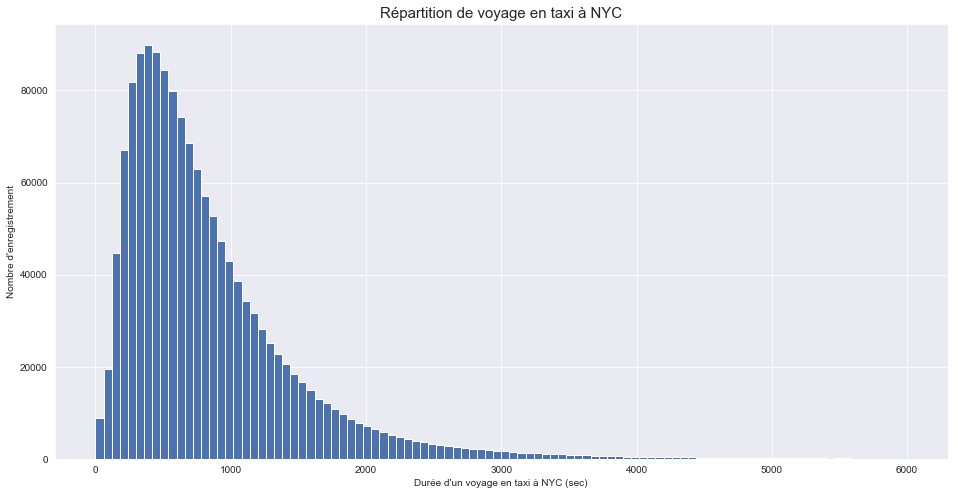

In [11]:
plt.hist(df.loc[df.trip_duration<6000,"trip_duration"], bins=100);
plt.title('Répartition de voyage en taxi à NYC')
plt.xlabel('Durée d\'un voyage en taxi à NYC (sec)')
plt.ylabel('Nombre d\'enregistrement')
plt.show()

> On observe que la répartition des valeurs de la durée d'une course de taxi à NYC est réparti à droite. Nous pouvons donc essayer d'appliquer un logarithme sur ces valeurs afin d'avoir un meilleur aperçu.

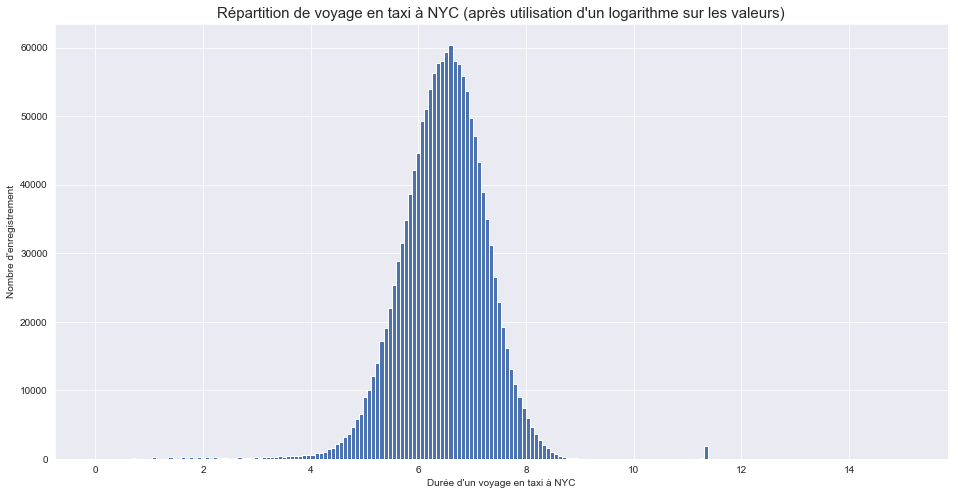

In [12]:
plt.hist(np.log(df.trip_duration), bins=200);
plt.title('Répartition de voyage en taxi à NYC (après utilisation d\'un logarithme sur les valeurs)')
plt.xlabel('Durée d\'un voyage en taxi à NYC')
plt.ylabel('Nombre d\'enregistrement')
plt.show()

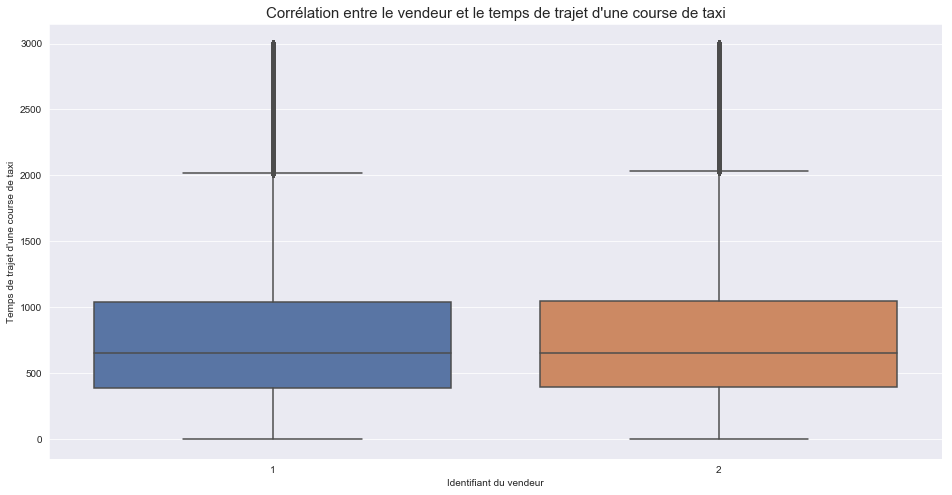

In [13]:
plt.figure()
g = sns.boxplot(x = 'vendor_id', y = 'trip_duration', data=df[df['trip_duration'] < 3000])
plt.title('Corrélation entre le vendeur et le temps de trajet d\'une course de taxi')
plt.xlabel('Identifiant du vendeur')
plt.ylabel('Temps de trajet d\'une course de taxi')
plt.show()

> On observe que la répartition du temps de trajet en est quasiment identique entre les deux entreprises. Je vais donc choisir de ne pas utiliser cette feature car elle n'est pas utile.

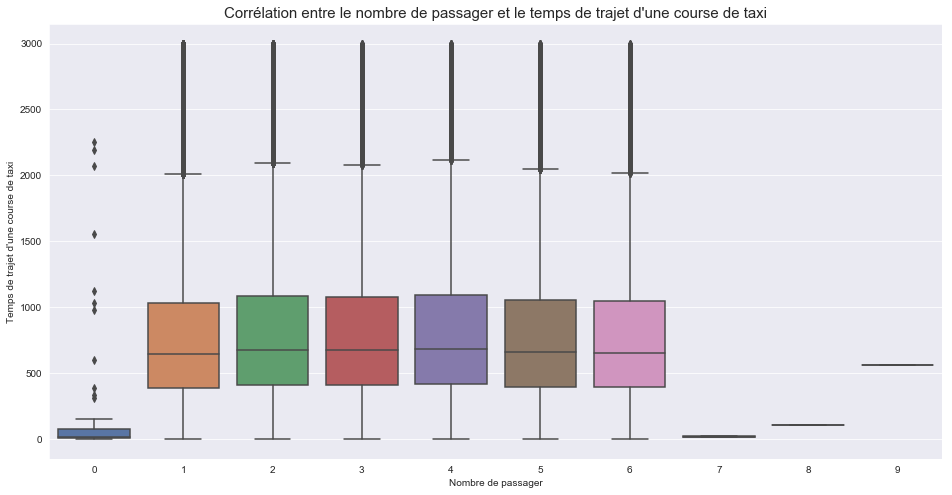

In [14]:
plt.figure()
g = sns.boxplot(x = 'passenger_count', y = 'trip_duration', data=df[df['trip_duration'] < 3000])
plt.title('Corrélation entre le nombre de passager et le temps de trajet d\'une course de taxi')
plt.xlabel('Nombre de passager')
plt.ylabel('Temps de trajet d\'une course de taxi')
plt.show()

> On observe que la répartition du temps de trajet en est quasiment identique quel que soit le nombre de passager. Je vais donc choisir de ne pas utiliser cette feature car elle n'est pas utile.
De plus, on observe qu'il y a certaine course qui n'ont pas de passager, ce qui n'a pas vraiment de sens. Je vais donc choisir de supprimer les entrées qui ont 0 passager.

In [15]:
df = df[df.passenger_count != 0]

## Data Preprocessing

### Missing & Duplicated values

In [16]:
df.duplicated().sum()

7

> On observe qu'il y a 7 entrées dupliquées dans notre dataframe. Je vais choisir de les supprimer car même s'il est possible que 7 courses soient absolument identique, cela paraît peut probable.

In [17]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [18]:
df.isna().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

> Aucune valeur est indéfini, je n'apporte donc pas de traitement particulier.

### Outliers

Text(0.5, 0.98, 'Visualisation des outliers')

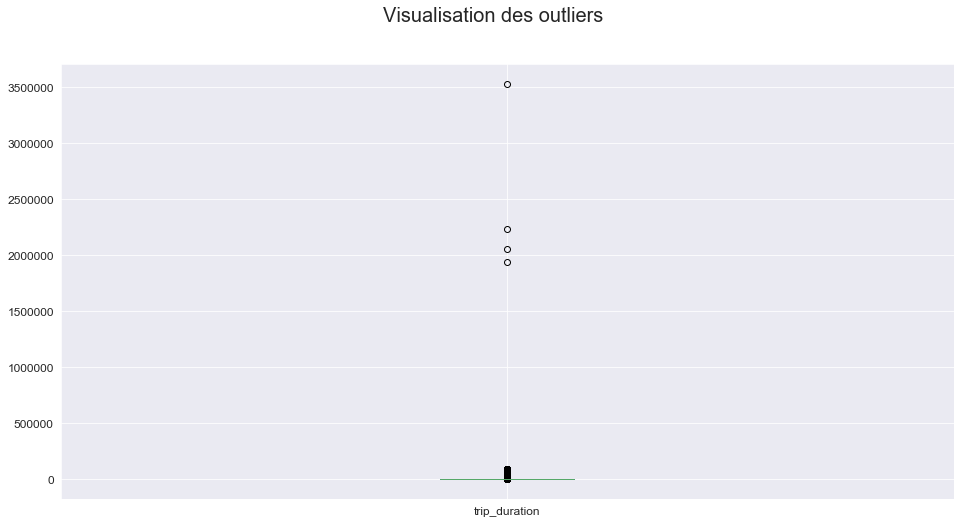

In [19]:
fig, ax = plt.subplots()
df.boxplot(['trip_duration'], fontsize=12)
fig.suptitle('Visualisation des outliers', fontsize=20)

> On observe qu'il y a certaines valeurs très extrèmes. Je considère qu'une course d'une durée inférieure à 1 minutes (60 secondes) et supérieure à 6 heures (21600 secondes) sont des outliers et donc méritent d'être supprimées

In [20]:
df = df[(df['trip_duration'] > 60) & (df['trip_duration'] < 3600 * 6)]

### Gestion des variables catégoriques

> Pour la colonne `store_and_fwd_flag`, il est nécessaire de passer les valeurs en valeurs numériques si on veut que ce soit compris par notre modèle.

In [21]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category').cat.codes
df_test['store_and_fwd_flag'] = df_test['store_and_fwd_flag'].astype('category').cat.codes

## Features engineering

### Features Extraction

#### Travail sur les coordonnées : https://www.kaggle.com/gaborfodor/from-eda-to-the-top-lb-0-367
> Comme j'avais du mal à travailler avec les coordonnées, je me suis inspiré du travail du kernel "From EDA to the Top" qui fait un traitement des coordonnées avec PCA. PCA est un module de scikit learn qui permet de transformer des objets en objet de plus petite dimention. Ici cela va permettre d'avoir des données plus simple à interpreter pour notre modèle de prédiction.

In [22]:
from sklearn.decomposition import PCA

In [23]:
coords = np.vstack((df[['pickup_latitude', 'pickup_longitude']].values,
                    df[['dropoff_latitude', 'dropoff_longitude']].values,
                    df_test[['pickup_latitude', 'pickup_longitude']].values,
                    df_test[['dropoff_latitude', 'dropoff_longitude']].values))

pca = PCA().fit(coords)

#Pour le fichier de train
df['pickup_pca0'] = pca.transform(df[['pickup_latitude', 'pickup_longitude']])[:, 0]
df['pickup_pca1'] = pca.transform(df[['pickup_latitude', 'pickup_longitude']])[:, 1]
df['dropoff_pca0'] = pca.transform(df[['dropoff_latitude', 'dropoff_longitude']])[:, 0]
df['dropoff_pca1'] = pca.transform(df[['dropoff_latitude', 'dropoff_longitude']])[:, 1]

#Pour le fichier de test
df_test['pickup_pca0'] = pca.transform(df_test[['pickup_latitude', 'pickup_longitude']])[:, 0]
df_test['pickup_pca1'] = pca.transform(df_test[['pickup_latitude', 'pickup_longitude']])[:, 1]
df_test['dropoff_pca0'] = pca.transform(df_test[['dropoff_latitude', 'dropoff_longitude']])[:, 0]
df_test['dropoff_pca1'] = pca.transform(df_test[['dropoff_latitude', 'dropoff_longitude']])[:, 1]

> Je me retrouve donc maintenant avec 4 nouvelles colonnes `pickup_pca0`, `pickup_pca1`, `dropoff_pca0` et `dropoff_pca1` qui correspondent à des données simplifiées de `pickup_latitude`, `pickup_longitude`, `dropoff_latitude` et `dropoff_longitude`.

In [24]:
df.head(3)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_pca0,pickup_pca1,dropoff_pca0,dropoff_pca1
id,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,0.007621,0.017007,-0.009739,0.013662
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,0.007585,-0.012418,0.027047,-0.018714
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,0.004730,0.012835,0.034109,-0.039404


#### Création des features `month`, `day` & `hour`

> Les dates sans traitement peuvent être difficile à interpréter. J'ai donc choisi d'extraire les valeurs intéressantes, c'est-à-dire le mois, le jour de la semaine et l'heure que j'extrais dans de nouvelles features.

In [25]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df_test['pickup_datetime'] = pd.to_datetime(df_test['pickup_datetime'])

In [26]:
df['hour'] = df.pickup_datetime.dt.hour
df['day'] = df.pickup_datetime.dt.dayofweek
df['month'] = df.pickup_datetime.dt.month
df_test['hour'] = df_test.pickup_datetime.dt.hour
df_test['day'] = df_test.pickup_datetime.dt.dayofweek
df_test['month'] = df_test.pickup_datetime.dt.month

#### Feature `distance`

> Pour la distance, j'ai choisi de faire un calcul simple qui correspond au calcul de la longueur d'un vecteur.

In [27]:
df['distance2'] = np.sqrt((df['pickup_pca0']-df['dropoff_pca0'])**2
                        + (df['pickup_pca1']-df['dropoff_pca1'])**2)
df_test['distance2'] = np.sqrt((df_test['pickup_pca0']-df_test['dropoff_pca0'])**2
                        + (df_test['pickup_pca1']-df_test['dropoff_pca1'])**2)

#### Transformation logarithmique

In [28]:
df['log_trip_duration'] = np.log(df['trip_duration'])

In [29]:
df.head(3)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_pca0,pickup_pca1,dropoff_pca0,dropoff_pca1,hour,day,month,distance2,log_trip_duration
id,,,,,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,0.007621,0.017007,-0.009739,0.013662,17,0,3,0.017680,6.120297
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,0.007585,-0.012418,0.027047,-0.018714,0,6,6,0.020456,6.496775
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,0.004730,0.012835,0.034109,-0.039404,11,1,1,0.059934,7.661056


In [30]:
df_test.head(3)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_pca0,pickup_pca1,dropoff_pca0,dropoff_pca1,hour,day,month,distance2
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,0.015663,-0.018495,0.016278,0.006233,23,3,6,0.024735
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,-0.005211,-0.071829,-0.008175,-0.096631,23,3,6,0.024979
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,0.024634,-0.012411,0.013843,-0.021111,23,3,6,0.013861


## Features selection

> Après plusieurs tests et déductions, j'ai choisi les features présentent ci-dessous. La target n'est maintenant plus `trip_duration` mais sa version log.

In [31]:
NUM_VARS = ['pickup_pca0', 'pickup_pca1', 'dropoff_pca0', 'dropoff_pca1', 'month', 'hour', 'day', 'distance2']
TARGET = 'log_trip_duration'

In [32]:
num_features = NUM_VARS

In [33]:
X_train = df.loc[:, num_features]
y_train = df[TARGET]
X_test = df_test.loc[:, num_features]
X_train.shape, y_train.shape, X_test.shape

((1447784, 8), (1447784,), (625134, 8))

## Training

In [34]:
from sklearn.ensemble import RandomForestRegressor

> Après plusieurs tests et déductions, j'ai choisi ces paramètres pour mon RandomForestRegressor.

In [35]:
m = RandomForestRegressor(n_estimators=17, min_samples_leaf=10, min_samples_split=15, max_features='auto', max_depth=80, bootstrap=True)
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
cv_scores = cross_val_score(m, X_train, y_train, cv=5, scoring='neg_mean_squared_log_error')
cv_scores

array([-0.00216923, -0.00213969, -0.00215236, -0.00215656, -0.00216043])

In [38]:
y_test_pred = m.predict(X_test)
y_test_pred[:5]

array([6.68780052, 6.39955385, 6.05717318, 6.93344858, 5.95586193])

In [39]:
my_submission = pd.DataFrame({'id': df_test.id, 'trip_duration': np.exp(y_test_pred)})
my_submission.to_csv('submission.csv', index=False)

> Voici les 100 premières prédictions que mon modèle à généré.

In [40]:
my_submission.head(100)

,id,trip_duration
0,id3004672,802.555106
1,id3505355,601.576586
2,id1217141,427.166205
3,id2150126,1026.026223
4,id1598245,386.009480
5,id0668992,981.657131
6,id1765014,1263.404077
7,id0898117,806.380211
8,id3905224,2219.856979
9,id1543102,572.186495
